In [2]:
import os
import numpy as np
import glob
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary
import torch.optim as optim
from time import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
sys.path.append('/zhome/45/0/155089/Deeplearning_in_computer_vision/Segmentation_project/Asignments_DeepLearningForCV/')  
from Performance_Metrics import dice_coefficient, intersection_over_union, accuracy, sensitivity, specificity
#import dataset PH2 
from DataLoader_PH2 import train_loader , val_loader, test_loader
import time 
from time import time  # Correct import

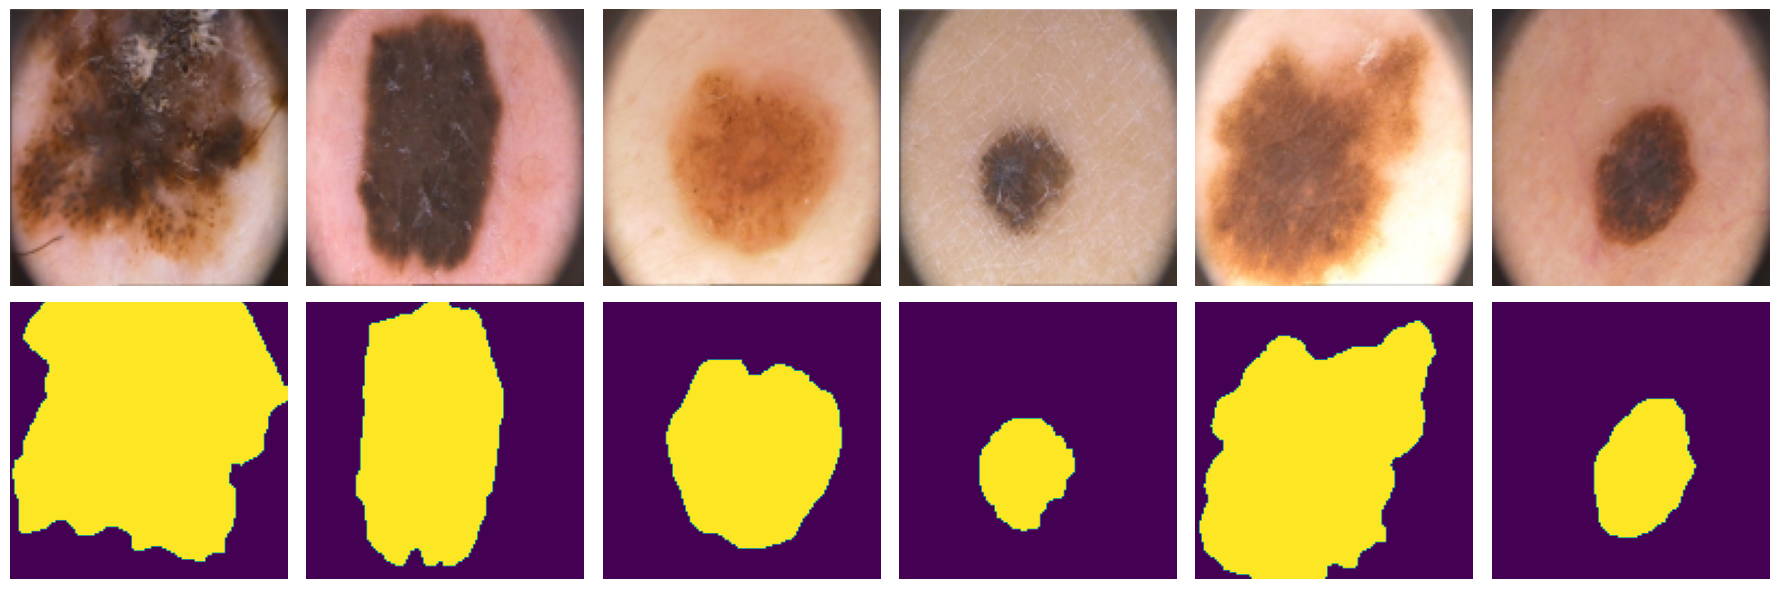

In [4]:
#Check if dataset looks okidoki
images, labels = next(iter(train_loader))

for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.imshow(np.swapaxes(np.swapaxes(images[i], 0, 2), 0, 1))
    plt.axis('off')  

    plt.subplot(2, 6, i+7)
    plt.imshow(labels[i].squeeze())
    plt.axis('off')  
    plt.tight_layout()

plt.show()

In [6]:
print(images.shape)
print(labels.shape)

torch.Size([20, 3, 128, 128])
torch.Size([20, 1, 128, 128])
